<a href="https://colab.research.google.com/github/phantomf4321/Bootcamp-PythonTeek-FlightrRadarAPI/blob/main/Aircrafts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SALAM

In [1]:
pip install FlightRadarAPI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.2 MB/s eta 0:00:00


In [2]:
# Define our main tools:
from FlightRadar24.api import FlightRadar24API
fr_api = FlightRadar24API()

# Definition of tools used in reading images
from PIL import Image
import requests
from io import BytesIO

# This library will be used to display images
from matplotlib import pyplot as plt

# Map tool
import folium

In [45]:
b = "35.90,35.00,51.10,51.70"
flights = fr_api.get_flights(bounds = b)

In [46]:
flights

[<(A320) C5-SUA - Altitude: 0 - Ground Speed: 0 - Heading: 33>,
 <(A319) EP-SSL - Altitude: 3275 - Ground Speed: 141 - Heading: 288>,
 <(N/A) N/A - Altitude: 0 - Ground Speed: 0 - Heading: 318>]

In [47]:
flight = flights[1]
flight_details = fr_api.get_flight_details(flight)

In [48]:
flight_details

{'identification': {'id': '3198c78b',
  'row': 5399487335,
  'number': {'default': 'MRJ4802', 'alternative': None},
  'callsign': 'MRJ4802'},
 'status': {'live': True,
  'text': 'Estimated- 11:41',
  'icon': None,
  'estimated': None,
  'ambiguous': False,
  'generic': {'status': {'text': 'estimated', 'type': 'arrival'},
   'eventTime': {'utc': 1692087103, 'local': 1692099703}}},
 'level': 'limited',
 'promote': False,
 'aircraft': {'model': {'code': 'A319', 'text': 'Airbus A319-112'},
  'countryId': 104,
  'registration': 'EP-SSL',
  'age': None,
  'msn': None,
  'images': {'thumbnails': [{'src': 'https://cdn.jetphotos.com/200/6/651898_1687359844_tb.jpg?v=0',
     'link': 'https://www.jetphotos.com/photo/11004170',
     'copyright': 'Mehdi Piltan',
     'source': 'Jetphotos'},
    {'src': 'https://cdn.jetphotos.com/200/5/626471_1683838981_tb.jpg?v=0',
     'link': 'https://www.jetphotos.com/photo/10967090',
     'copyright': 'Mehdi Piltan',
     'source': 'Jetphotos'},
    {'src': 'ht

In [49]:
aircraft = flight_details['aircraft']
airline = flight_details['airline']

if flight_details['airport']['origin'] != None:
    origin = flight_details['airport']['origin']['name']
else:
    origin = None

if flight_details['airport']['destination'] != None:
    destination = flight_details['airport']['destination']['name']
    destination_icao = flight_details['airport']['destination']['code']['icao']
else:
    destination = None

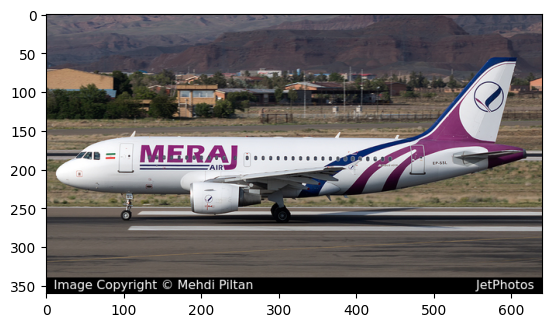

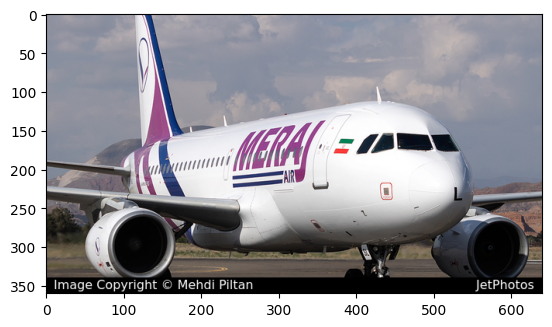

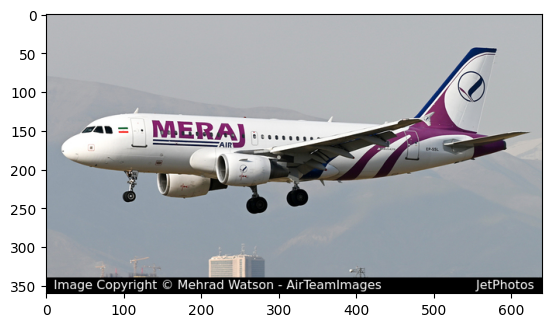

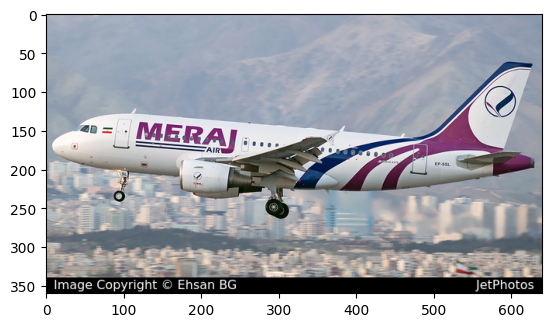

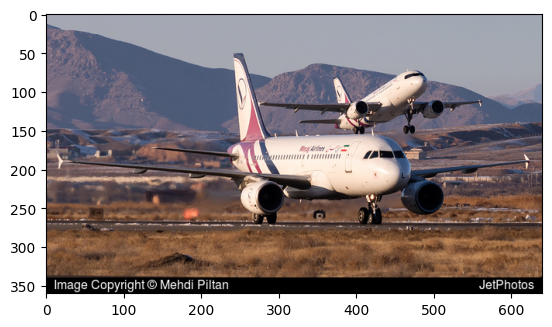

In [50]:
response = flight_details['aircraft']['images']['large']
for r in response:
  curr_response = requests.get(r['src'])
  img2 = Image.open(BytesIO(curr_response.content))

  # Show the loaded image
  #img2.show()

  plt.imshow(img2,cmap='gray')
  plt.show()




In [51]:
if airline != None:
    print(aircraft['model']['text'], ": ", airline['name'], "/", airline['code']['icao'])
    print("{} ----> {}".format(origin, destination))

Airbus A319-112 :  Meraj Airlines / MRJ
Al Najaf International Airport ----> Tehran Imam Khomeini International Airport


In [52]:
airport = fr_api.get_airport(destination_icao)
distance = flight.get_distance_from(airport)

print("{}km".format(distance))

2.1619399712302063km
